AMA - Lista 01

**Questão 1**

Considere o conjunto de dados disponível em _articial1d.csv_ organizado em duas colunas, x e y. Seja um modelo de regressão linear para yˆ = f(x).

**a)** Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.

**b)** Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

**c)** Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo SGD (gradiente descendente estocástico). Plote a reta resultante sobre os dados.





_**RESOLUÇÃO**_


**a)** Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.

$$\begin{aligned}
\hat{\boldsymbol{y}} = \boldsymbol{X}\boldsymbol{w}\\
\text{}\\
\hat{\boldsymbol{w}} = \arg\min_{\boldsymbol{w}} ||\boldsymbol{y} - \boldsymbol{X}\boldsymbol{w}||^2
\end{aligned}$$

$$\hat{\boldsymbol{w}} = (\boldsymbol{X}^{\top}\boldsymbol{X})^{-1} \boldsymbol{X}^{\top}\boldsymbol{y}$$


$$\boldsymbol{X} = [\mathbf{1}^{\top} \;,\; \mathtt{artificial1d[:,[0,1]}]\\
\boldsymbol{y} = \mathtt{artificial1d[:,[2]]}$$


$$\mathrm{MSE} = {\frac{1}{n}\sum_i^n (\boldsymbol{y} - \hat{\boldsymbol{y}})^2}$$

In [1]:
#Importing Libs in order to solve the problems;

import numpy as np
import math

#Importing Other Plot Libs;
import matplotlib.pyplot as plt

##### Sklearn - Used Just To Split The Train and Test data over the first question; 
#### On the second question one, I've just split it manually as requested;
from sklearn.model_selection import train_test_split 


MSE: 	 0.27703277239017177
W: 	 [[0.09353807]
 [1.76590678]]


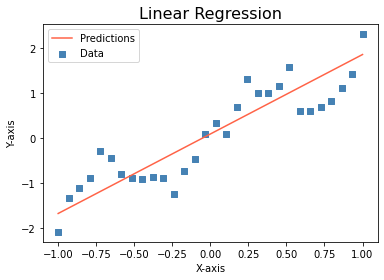

In [2]:
###Linear Regression

#Loading the dataset;
a_ds = np.genfromtxt('./artificial1d.csv', delimiter=',')

#LinearRegression Function
def LinearRegression(dataset):
    #Spliting the X and Y data;
    y_a = a_ds[:,[1]]
    x_a = a_ds[:,[0]]

    #Creating an ones range-"column"
    onecolumn_a = np.ones(x_a.shape[0])

    #Getting a Linear Model
    X_a = np.c_[onecolumn_a, x_a]

    #Splitting the data in Train and Test datas;
    X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a)

    #The Normal Equation as seen above
    w_a_pred = (np.linalg.inv((X_a_train.T @ X_a_train)) @ X_a_train.T) @ y_a_train #Theta function;

    #Creating the y_predict for the X_Text and for all Model OUTPUTS;
    y_a_pred = X_a_test @ w_a_pred
    y_a_pred_all = X_a @ w_a_pred

    #Getting y_Test Size/Shape
    n_a = y_a_test.shape[0]

    #Calculing the RMSE ()
    mse_a = (1/n_a) * ((y_a_test - y_a_pred)**2).sum()
    
    print("MSE: \t", mse_a)
    print("W: \t", w_a_pred)
    plt.scatter(x_a, y_a, color='steelblue', label='Data', marker="s")
    plt.plot(x_a, y_a_pred_all, color='tomato', label='Predictions')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.title("Linear Regression", size=16)
    plt.show()
    
LinearRegression(a_ds)

**b)** Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.


$$\boldsymbol{w}(t) = \boldsymbol{w}(t-1) + \alpha \frac{1}{N}\sum_{i=1}^{N} e_i(t-1) \boldsymbol{x}_i\\
\text{em que } e_i(t-1) = y_i - \boldsymbol{w}^{\top}(t-1)\boldsymbol{x}_i$$

Learning Rate: 	 0.1
Interations: 	 1000
MSE: 		 0.2134009013293699
W: 		 [0.06761792 1.57486517]


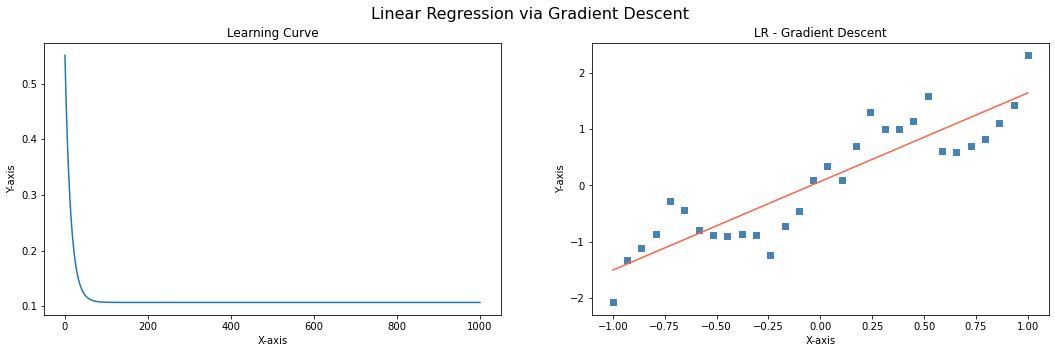

In [4]:
###Linear Regression via Gradient Descent
#Dataset has been loaded already;
#LinearRegression via Gradient Descent Function
def GradDesc(dataset):
    y_b = dataset[:,[1]]
    x_b = dataset[:,[0]]

    onecolumn_b = np.ones(x_b.shape[0])

    X_b = np.c_[onecolumn_b, x_b]
    w_b_pred = np.zeros(X_b.shape[1])

    alpha_b = 0.1
    epoch_b = 1000

    y_b_pred = w_b_pred[0]  + w_b_pred[1]*X_b[:,[1]]
    err_b = y_b - y_b_pred

    err_list_b = [((err_b)**2).sum()/(X_b.shape[0]*2)]

    for e in range (0, epoch_b):
        w_b_pred[0] = w_b_pred[0] + (alpha_b*(1/X_b.shape[0])*err_b.sum())
        w_b_pred[1] = w_b_pred[1] + (alpha_b*(1/X_b.shape[0])* (err_b*X_b[:,[1]]).sum())

        y_b_pred = w_b_pred[0] + w_b_pred[1] * X_b[:,[1]]
        err_b = y_b - y_b_pred

        err_list_b.append(((err_b)**2).sum()/(X_b.shape[0]*2))

    mse_b = (1/X_b.shape[0]) * ((y_b - y_b_pred)**2).sum()
    
    print("Learning Rate: \t", alpha_b)
    print("Interations: \t", epoch_b)
    print("MSE: \t\t", mse_b)
    print("W: \t\t", w_b_pred)
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.plot(range(0,len(err_list_b)),err_list_b)
    plt.rcParams["figure.figsize"] = [18,5]
    plt.title("Learning Curve")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    plt.subplot(1, 2, 2) # index 2
    plt.scatter(x_b, y_b, color='steelblue', label='Data', marker="s")
    plt.plot(x_b, y_b_pred, color='tomato', label='Predictions')
    plt.title("LR - Gradient Descent")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.suptitle("Linear Regression via Gradient Descent", size=16)
    plt.show()

GradDesc(a_ds)

**c)** Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo SGD (gradiente descendente estocástico). Plote a reta resultante sobre os dados.


$$\boldsymbol{w}(t) = \boldsymbol{w}(t-1) + \alpha e_i(t-1) \boldsymbol{x}_i\\
\text{em que } e_i(t-1) = y_i - \boldsymbol{w}^{\top}(t-1)\boldsymbol{x}_i$$

Learning Rate: 	 0.01
Interations: 	 1000
MSE: 		 0.21340148246949403
W: 		 [0.06769927 1.57613496]


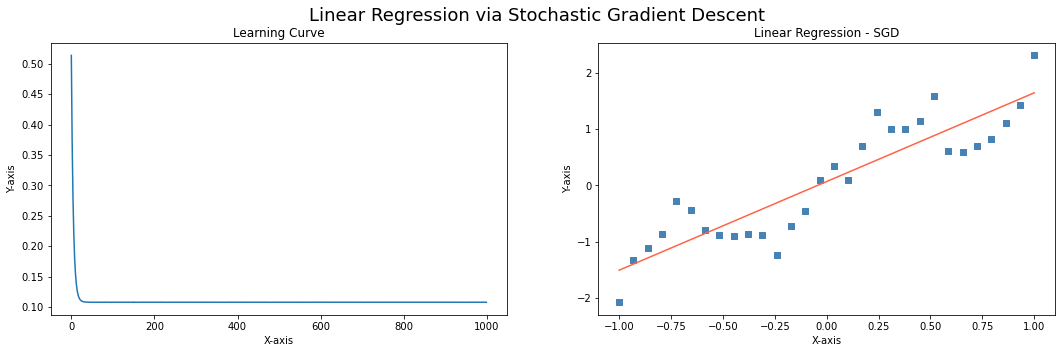

In [5]:
###Linear Regression via Gradient Descent Stochast
def GradDescS(dataset):
    y_c = dataset[:,[1]] #Comprimento - Saída do Modelo
    x_c = dataset[:,[0]]
    onecolumn_c = np.ones(x_c.shape[0])

    X_c = np.c_[onecolumn_c, x_c]

    w_c_pred = np.zeros(X_c.shape[1])

    alpha_c = 0.01

    epoch_c = 1000

    y_c_pred = w_c_pred[0]  + w_c_pred[1]*X_c[:,[1]]

    err_list_c = []

    for each_c in range(0, epoch_c):
        #"Misturar" dataset
        shuffler_c = np.random.permutation(a_ds.shape[0])
        X_c_new = X_c[shuffler_c]
        y_c_new = y_c[shuffler_c]
        error_sum_c = 0    

        for i in range(0, X_c_new.shape[0]):

            y_c_pred = w_c_pred[0] + w_c_pred[1] * X_c_new[i,[1]]
            err_c = y_c_new[i] - y_c_pred
            w_c_pred[0] = w_c_pred[0] + alpha_c * err_c
            w_c_pred[1] = w_c_pred[1] + alpha_c * (err_c*X_c_new[i,[1]])

            error_sum_c += (err_c)**2

        err_list_c.append(error_sum_c/(2*X_c_new.shape[0]))

    y_c_pred = w_c_pred[0] + w_c_pred[1] * X_c[:,[1]]   
    
    mse_c = (1/X_c.shape[0]) * ((y_c - y_c_pred)**2).sum()
    
    print("Learning Rate: \t", alpha_c)
    print("Interations: \t", epoch_c)
    print("MSE: \t\t", mse_c)
    print("W: \t\t", w_c_pred)
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.plot(range(0,len(err_list_c)),err_list_c)
    plt.rcParams["figure.figsize"] = [15,5]
    plt.title("Learning Curve")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    plt.subplot(1, 2, 2) # index 2
    plt.scatter(x_c, y_c, color='steelblue', label='Data', marker="s")
    plt.plot(x_c, y_c_pred, color='tomato', label='Predictions')
    plt.title("Linear Regression - SGD")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.suptitle("Linear Regression via Stochastic Gradient Descent", size=18)
    plt.show()

GradDescS(a_ds)

**Questão 2**

Considere o conjunto de dados disponível em california.csv, organizado em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída.
Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset.

**a)** Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

**b)** Treine 11 modelos de regressão polinomial, com ordens de 1 a 11. Você pode usar o algoritmo OLS.

**c)** Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento e no teste para cada modelo. Faça um gráfico para o treino e um gráfico para o teste.

**d)** Repita os 2 itens anteriores incluindo um termo de regularização L2 (por exemplo, com fator λ = 0.001).
Nota: Normalize os dados antes do treinamento e _desnormalize_ antes de calcular o RMSE.


**RESOLUÇÃO:**

**a)** Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

In [6]:
#Loding California DataSet
ca_ds = np.genfromtxt('./california.csv', delimiter=',')

In [7]:
#Normalizing the X_Data with Zscore
def NormZscore(data):
    mean = np.mean(data, axis = 0)
    data_int = data - mean
    sdt = np.std(data, axis = 0)
    data_norm = data_int / sdt

    return data_norm, mean, sdt

def DesnZscore(data,m,s):
    return data * s + m

In [8]:
#Ramdom Dataset and split it into 80% and 20%
def ShurffleandSplit(dataset):
    
    shuf = np.random.permutation(dataset)
    n = shuf.shape[0]

    perc_oitenta = int(0.8*n)
    perc_vinte = int(0.2*n)
    
    return perc_oitenta, perc_vinte

In [9]:
x = ca_ds[:,0:7]
y = ca_ds[:,[8]]

perc_oitenta, perc_vinte = ShurffleandSplit(np.c_[x, y])


In [10]:
def OLS(x, y, p8, p2):
    xnorm, me, sd = NormZscore(x)
    
    x_train, x_test = xnorm[0:p8], xnorm[-p2:]
    y_train, y_test = y[0:p8], y[-p2:]

    onecolumn_train = np.ones(x_train.shape[0])
    onecolumn_test = np.ones(x_test.shape[0])

    #Constante - 1's
    X_train = np.c_[onecolumn_train, x_train]
    X_test = np.c_[onecolumn_test, x_test]

    w_pred = (np.linalg.inv((X_train.T @ X_train)) @ X_train.T) @ y_train #Theta function;

    x_desn_train = DesnZscore(x_train, me, sd)
    x_desn_test = DesnZscore(x_test, me, sd)

    X_train_des = np.c_[onecolumn_train, x_desn_train]
    X_test_des = np.c_[onecolumn_test, x_desn_test]

    y_pred_train = X_train_des @ w_pred
    y_pred_test = X_test_des @ w_pred

    n_train = y_train.shape[0]
    n_test = y_test.shape[0]

    rmse_train = math.sqrt((1/n_train) * ((y_train - y_pred_train)**2).sum())
    rmse_test = math.sqrt((1/n_test) * ((y_test - y_pred_test)**2).sum())
    
    return rmse_train, rmse_test, w_pred

**b)** Treine 11 modelos de regressão polinomial, com ordens de 1 a 11. Você pode usar o algoritmo OLS.

**c)** Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento e no teste para cada modelo. Faça um gráfico para o treino e um gráfico para o teste.

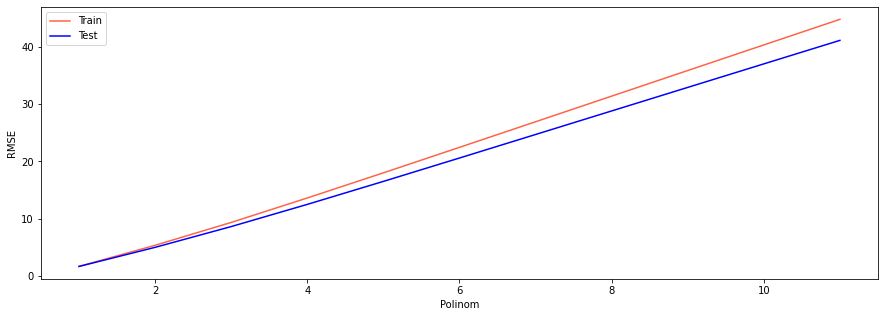

In [11]:
#defining Polinomial Regression

ols_pol = [OLS(x, y, perc_oitenta, perc_vinte)]

for i in range(2,12):
    column_pol = (x)**i
    
    # # #Creating a New Matrix Adding the Polinomial Column at Begin.
    ca_ds_n = np.c_[x, column_pol]
    
    # # #Appending The Results - 
    ols_pol.append(OLS(ca_ds_n, y, perc_oitenta, perc_vinte))

ols_pol = np.array(ols_pol, dtype=object)

rmse_train_all = np.array(ols_pol[:,[0]], dtype=float)
rmse_test_all = np.array(ols_pol[:,[1]], dtype=float)

#print(rmse_train_all, rmse_test_all)
plt.plot(range(1,12), np.log10(rmse_train_all), color='tomato', label='Train')
plt.plot(range(1,12), np.log10(rmse_test_all), color='blue', label='Test')
plt.xlabel("Polinom")
plt.ylabel("RMSE")
plt.rcParams["figure.figsize"] = [10,5]
plt.legend()
plt.show()

**d)** Repita os 2 itens anteriores incluindo um termo de regularização L2 (por exemplo, com fator λ = 0.001).

In [12]:
def OLSREG(x, y, p8, p2):
    l = 0.001
    
    xnorm, me, sd = NormZscore(x)
    
    x_train, x_test = xnorm[0:p8], xnorm[-p2:]
    y_train, y_test = y[0:p8], y[-p2:]

    onecolumn_train = np.ones(x_train.shape[0])
    onecolumn_test = np.ones(x_test.shape[0])

    #Constante - 1's
    X_train = np.c_[onecolumn_train, x_train]
    X_test = np.c_[onecolumn_test, x_test]
    
    m_identity = np.identity(X_train.shape[1])
    m_identity[0,0] = 0
    
    w_pred = (np.linalg.inv((X_train.T @ X_train + l*m_identity)) @ X_train.T) @ y_train #Theta function;

    x_desn_train = DesnZscore(x_train, me, sd)
    x_desn_test = DesnZscore(x_test, me, sd)

    X_train_des = np.c_[onecolumn_train, x_desn_train]
    X_test_des = np.c_[onecolumn_test, x_desn_test]

    y_pred_train = X_train_des @ w_pred
    y_pred_test = X_test_des @ w_pred

    n_train = y_train.shape[0]
    n_test = y_test.shape[0]

    rmse_train = math.sqrt((1/n_train) * ((y_train - y_pred_train)**2).sum())
    rmse_test = math.sqrt((1/n_test) * ((y_test - y_pred_test)**2).sum())
    
    return rmse_train, rmse_test, w_pred

Test and Train RMSE Values
---------------------------------
[[4.37551752e+01 4.37551548e+01]
 [9.54885905e+04 9.54544947e+04]
 [4.09092770e+08 4.08927945e+08]
 [3.09123782e+12 3.08984234e+12]
 [3.22586245e+16 3.22439089e+16]
 [3.95507516e+20 3.95338047e+20]
 [5.12413831e+24 5.12211460e+24]
 [6.71380200e+28 6.71134577e+28]
 [8.76824892e+32 8.76524332e+32]
 [1.13714585e+37 1.13677636e+37]
 [1.46413036e+41 1.46367473e+41]]
---------------------------------


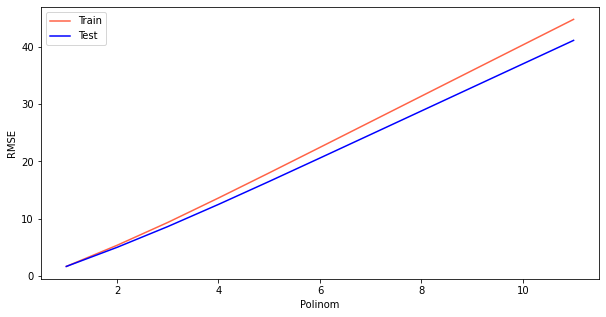

In [29]:
#defining Polinomial Regression

ols_pol_reg = [OLSREG(x, y, perc_oitenta, perc_vinte)]

for i in range(2,12):
    column_pol_reg = (x)**i
    
    # # #Creating a New Matrix Adding the Polinomial Column at Begin.
    ca_ds_n_reg = np.c_[x, column_pol_reg]
    
    # # #Appending The Results - 
    ols_pol_reg.append(OLSREG(ca_ds_n_reg, y, perc_oitenta, perc_vinte))

ols_pol_reg = np.array(ols_pol_reg, dtype=object)

rmse_train_all_reg = np.array(ols_pol_reg[:,[0]], dtype=float)
rmse_test_all_reg = np.array(ols_pol_reg[:,[1]], dtype=float)

print('Test and Train RMSE Values')
print('-' * 33)
print(np.c_[rmse_test_all, rmse_test_all_reg])
print('-' * 33)
plt.plot(range(1,12), np.log10(rmse_train_all_reg), color='tomato', label='Train')
plt.plot(range(1,12), np.log10(rmse_test_all_reg), color='blue', label='Test')
plt.xlabel("Polinom")
plt.ylabel("RMSE")
plt.rcParams["figure.figsize"] = [10,5]
plt.legend()
plt.show()